In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb

In [26]:
data_hc = pickle.load(open('c1toc3_70bar6C_nowater.pkl', 'rb'))
all3_data_hc = [x for x in data_hc if (x[4] != []) and (x[4][1][0] > 1e-10) and (x[4][1][1] > 1e-10)]
all3_data = [x for x in data_hc if (x[4] != [])]

In [27]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum(np.abs(x[4][0][:, 0] - x[4][0][:, 1])) < 1e-6:
        if (x[4][1][0] > x[4][1][1]) and (x[4][1][0] > 1e-10):
            index_get.append(0)
        elif (x[4][1][1] > 1e-10):
            index_get.append(1)
    else:
        if x[4][1][0] > 1e-10:
            index_get.append(0)
        if x[4][1][1] > 1e-10:
            index_get.append(1)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'black'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        elif sorted(index_get) == [1,2]:
            color = 'gray'
        else:
            color = 'black'
    return index_get, color

In [28]:
def plot_tern_lines(x, tern_inds=[0,1,2], plot_ties=True, return_vals=False, include_xy=False):
    z = x[4][0]
    if np.sum(x[1][tern_inds]) == 1:
        index_get, color = get_stable_phases(x)
        if include_xy:
            x, y = sr2xy(x[1][tern_inds[1]], x[1][tern_inds[0]])
            plt.plot(x, y, 'k.')
        if x[-1][-1] < 1e-6:
            if (len(index_get) == 2) and (color != 'black'):
                if (len(z) == 3) or (x[1][tern_inds[2]] == 0.0):
                    x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                    x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                else:
                    x1, y1 = sr2xy(0, z[0, index_get[0]])
                    x2, y2 = sr2xy(0, z[0, index_get[1]])
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                if plot_ties and not return_vals:
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                elif not return_vals:
                    plt.plot(x1, y1, 'r.')
                    plt.plot(x2, y2, 'b.')
                else:
                    return x1, x2, y1, y2
                        
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
                


                

In [29]:
def sr2xy(c1, c2):
    x = c1 + 0.5 * c2
    y = c2 * (np.sqrt(3.0) / 2.0)
    return x, y

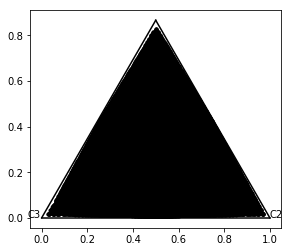

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
phase_one = [[], []]
phase_two = [[], []]

tern_inds = [1, 2, 3]
error_count = 0
for x in all3_data:
    try:
        x1, x2, y1, y2 = plot_tern_lines(x, tern_inds=tern_inds, return_vals=True, include_xy=True)
        phase_one[0].append(x1)
        phase_one[1].append(y1)
        phase_two[0].append(x2)
        phase_two[1].append(y2)
    except:
        error_count += 1
plt.plot(phase_one[0], phase_one[1], 'r.')
plt.plot(phase_two[0], phase_two[1], 'b.')


# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
plt.text(-0.06, 0, 'C' + str(tern_inds[2]))
plt.text(1.0, 0, 'C' + str(tern_inds[1]))



# plt.ylim([0.7, 0.85])
# plt.xlim([0.4, 0.6])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])
plt.savefig('test.svg')
plt.show()

In [ ]:
phase_two

In [ ]:
len(all3_data_hc)

In [7]:
all3_data_hc

[[69942,
  array([ 0.        ,  0.4017094 ,  0.41025641,  0.18803419]),
  ('methane', 'ethane', 'propane'),
  array([ 0.4017094 ,  0.41025641,  0.18803419]),
  [array([[ 0.58365911,  0.40146663],
          [ 0.32262478,  0.41037333],
          [ 0.09371611,  0.18816003]]),
   array([ 0.00133248,  0.99866752]),
   array([[ 1.        ,  0.6878448 ],
          [ 1.        ,  1.27198302],
          [ 1.        ,  2.00776459]]),
   29,
   8.4658395842207579e-07]],
 [69943,
  array([ 0.        ,  0.4017094 ,  0.41880342,  0.17948718]),
  ('methane', 'ethane', 'propane'),
  array([ 0.4017094 ,  0.41880342,  0.17948718]),
  [array([[ 0.57725803,  0.40123395],
          [ 0.33154583,  0.41903975],
          [ 0.09119615,  0.17972631]]),
   array([ 0.00270107,  0.99729893]),
   array([[ 1.        ,  0.69506906],
          [ 1.        ,  1.26389662],
          [ 1.        ,  1.97076482]]),
   30,
   8.134132053194687e-07]],
 [69963,
  array([ 0.        ,  0.40178571,  0.41071429,  0.1875    ]),
 

In [ ]:
no_ethane_hc = [x for x in data_hc if x[1][2] == 0.0]

In [ ]:
no_ethane_hc

In [11]:
error_count

2201

In [12]:
len(all3_data_hc)

26912